In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

df = pd.read_csv('S05-hw-dataset.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [24]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

In [22]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [26]:
X = df.drop(columns=['client_id', 'default'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
1807,44,69026,20,574,0.329730,0,11,1,0,41351,9476,0.708387,6,1,7
220,27,32483,27,787,0.130256,4,8,0,1,45155,5254,0.526402,10,4,7
1534,61,57865,11,752,0.305342,6,1,0,1,0,8447,0.313577,10,3,13
468,29,91655,22,645,0.501431,0,11,0,1,11929,6663,0.444252,1,1,6
974,28,63934,19,656,0.267514,1,9,0,0,24708,3864,0.195720,16,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,35,33067,31,721,0.334815,1,6,0,1,9529,6803,0.205425,8,3,7
2626,68,49543,0,656,0.303512,3,8,1,1,17130,22804,0.354079,5,3,6
2688,52,67095,30,803,0.627390,6,2,0,1,14739,3345,0.580329,19,0,10
751,28,94489,34,534,0.320567,6,3,1,0,14508,10708,0.418475,15,2,14


In [27]:
X_train

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
1807,44,69026,20,574,0.329730,0,11,1,0,41351,9476,0.708387,6,1,7
220,27,32483,27,787,0.130256,4,8,0,1,45155,5254,0.526402,10,4,7
1534,61,57865,11,752,0.305342,6,1,0,1,0,8447,0.313577,10,3,13
468,29,91655,22,645,0.501431,0,11,0,1,11929,6663,0.444252,1,1,6
974,28,63934,19,656,0.267514,1,9,0,0,24708,3864,0.195720,16,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,35,33067,31,721,0.334815,1,6,0,1,9529,6803,0.205425,8,3,7
2626,68,49543,0,656,0.303512,3,8,1,1,17130,22804,0.354079,5,3,6
2688,52,67095,30,803,0.627390,6,2,0,1,14739,3345,0.580329,19,0,10
751,28,94489,34,534,0.320567,6,3,1,0,14508,10708,0.418475,15,2,14


In [29]:
y_train

1807    1
220     0
1534    0
468     1
974     0
       ..
2185    1
2626    1
2688    0
751     0
2552    0
Name: default, Length: 2400, dtype: int64

In [18]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy_acc = accuracy_score(y_test, dummy.predict(X_test))
dummy_roc = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])

In [ ]:
dumm

In [64]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, solver='lbfgs'))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [65]:
print(f"Лучшее значение C: {grid_search.best_params_['logreg__C']}")

Лучшее значение C: 100


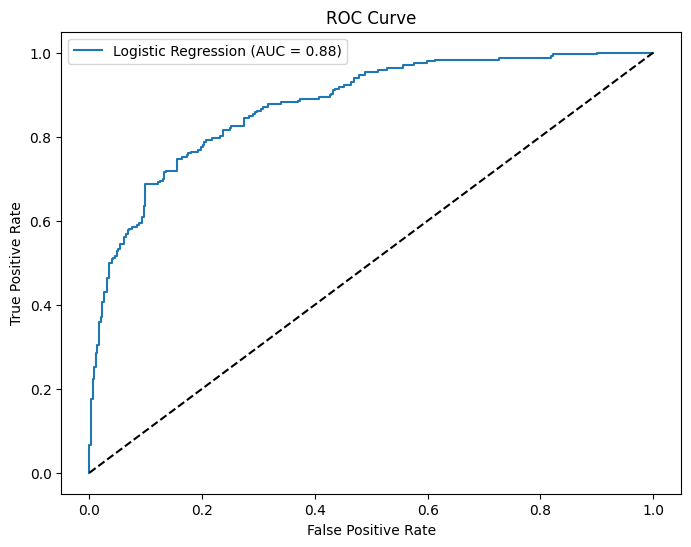

In [38]:
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('figures/roc_curve.png')
plt.show()

In [31]:
results = pd.DataFrame({
    'Model': ['Dummy (Baseline)', 'Logistic Regression'],
    'Accuracy': [dummy_acc, accuracy_score(y_test, best_model.predict(X_test))],
    'ROC-AUC': [dummy_roc, roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])]
})
results

,Model,Accuracy,ROC-AUC
0,Dummy (Baseline),0.590000,0.500000
1,Logistic Regression,0.801667,0.875649
